In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration "
pandasDf =  pd.read_sql(insert_query, con=db_conn)

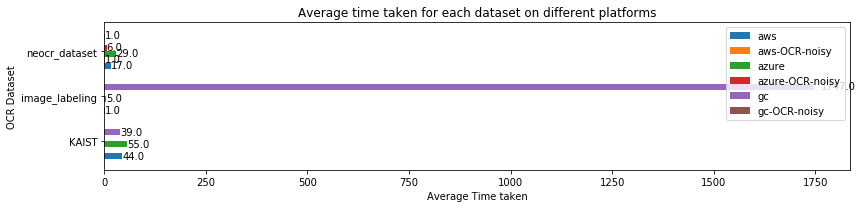

In [3]:
# KAIST neocr_dataset
#pandasDf = pandasDf[(pandasDf['label']!='gc') &  (pandasDf['dataset']!='image_labeling')]
pdOcr = pandasDf[pandasDf['dataset'].isin(['KAIST', 'neocr_dataset', 'image_labeling'])]
pdOcrSuccess = pdOcr[pdOcr['status']!='0']
pdOcrSuccess.loc[pdOcrSuccess.label == 'aws-OCR', 'label'] = 'aws'
pdOcrSuccess.loc[pdOcrSuccess.label == 'azure-OCR', 'label'] = 'azure'
pdOcrSuccess.loc[pdOcrSuccess.label == 'gc-OCR', 'label'] = 'gc'
#pdOcrSuccess['score']=pdOcrSuccess['score'].astype('float64')
pdOcrSuccess['time']=pdOcrSuccess['time'].astype('float64')
pdOcrSuccess['status']=pdOcrSuccess['status'].astype('int32')

pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='status', aggfunc='count')

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

In [4]:
pdOcr = pandasDf[pandasDf['dataset'].isin(['KAIST', 'neocr_dataset'])]
pdOcrSuccess = pdOcr[pdOcr['status']!='0']
pdOcrSuccess.loc[pdOcrSuccess.label == 'aws-OCR', 'label'] = 'aws'
pdOcrSuccess.loc[pdOcrSuccess.label == 'azure-OCR', 'label'] = 'azure'
pdOcrSuccess.loc[pdOcrSuccess.label == 'gc-OCR', 'label'] = 'gc'
pdOcrSuccess['score']=pdOcrSuccess['score'].astype('float64')
pdOcrSuccess['time']=pdOcrSuccess['time'].astype('float64')
pdOcrSuccess['status']=pdOcrSuccess['status'].astype('int32')

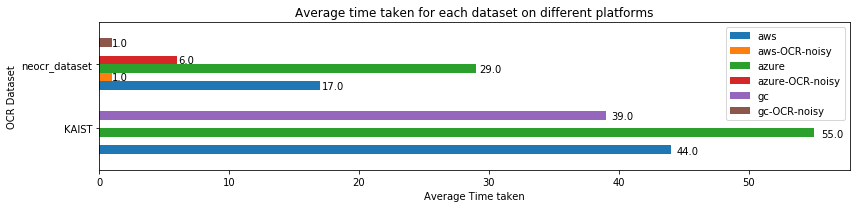

In [5]:
#plt.figure(figsize=(1, 1))
pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='status', aggfunc='count')

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

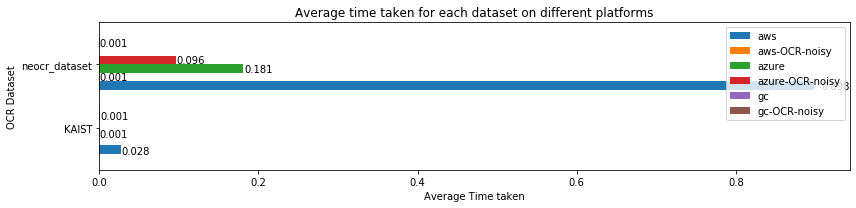

In [6]:
#plt.figure(figsize=(1, 1))
pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='time', aggfunc=np.mean)

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))